In [1]:
import numpy as np

In [5]:
m, n = 10000, 50
X = np.random.randint(-15, 15, size=(m, n))
X.shape

(10000, 50)

In [6]:
X_centered = X - X.mean(axis=0)
U, sigma, Vt = np.linalg.svd(X_centered)

In [7]:
U.shape

(10000, 10000)

In [8]:
sigma.shape

(50,)

In [9]:
Vt.shape

(50, 50)

In [10]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [11]:
c1.shape

(50,)

In [23]:
d = 30
Wd = Vt.T[:, :d]

$X_{projected} = X W_d$

In [24]:
XdD = X_centered.dot(Wd)

In [25]:
XdD.shape

(10000, 30)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=d)
XdD_sklearn = pca.fit_transform(X)

In [28]:
XdD_sklearn.shape

(10000, 30)

In [29]:
pca.components_.T

array([[-0.13441961, -0.09293291, -0.02578989, ..., -0.01144629,
        -0.13053175, -0.07690593],
       [ 0.03283136,  0.20917126, -0.07232436, ..., -0.08019307,
        -0.19827658,  0.18694009],
       [ 0.08020226, -0.02451619,  0.04662539, ..., -0.01397841,
        -0.13160686,  0.17148189],
       ...,
       [ 0.12223548,  0.04186511,  0.22872468, ..., -0.15405907,
         0.09207028,  0.0014348 ],
       [ 0.10931932,  0.03130247, -0.06233703, ..., -0.0547071 ,
        -0.1130952 ,  0.03154218],
       [-0.27688566, -0.23109402,  0.01025828, ...,  0.1066564 ,
        -0.21716957,  0.24871648]])

In [30]:
Wd

array([[-0.12205732,  0.11917602, -0.11554919, ..., -0.11818472,
        -0.20148278,  0.08462526],
       [ 0.02209074, -0.02474021,  0.11426553, ...,  0.09901409,
        -0.17816397,  0.0069393 ],
       [ 0.06909609, -0.05495674, -0.07131312, ..., -0.15142304,
        -0.1074921 , -0.20471688],
       ...,
       [ 0.12430057, -0.19187306, -0.04804735, ..., -0.16019035,
        -0.22352539,  0.10995163],
       [ 0.12272708,  0.02828213,  0.075061  , ..., -0.00575135,
        -0.03459688,  0.09232719],
       [-0.24395694,  0.17049873, -0.00586695, ...,  0.0407898 ,
         0.08713727,  0.01143697]])

In [31]:
pca.explained_variance_ratio_

array([0.02274995, 0.02243434, 0.02234964, 0.0223107 , 0.02192477,
       0.02186725, 0.02159503, 0.02149152, 0.02136849, 0.02127337,
       0.02119681, 0.02104337, 0.02092357, 0.02076691, 0.02074176,
       0.02066103, 0.02049602, 0.02048126, 0.0203793 , 0.02024158,
       0.02005319, 0.02000359, 0.01990619, 0.0197938 , 0.01971836,
       0.01968459, 0.01950735, 0.01936091, 0.01926203, 0.01910696])

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.02274995, 0.04518429, 0.06753393, 0.08984464, 0.11176941,
       0.13363666, 0.15523169, 0.17672321, 0.1980917 , 0.21936507,
       0.24056187, 0.26160524, 0.28252881, 0.30329572, 0.32403748,
       0.34469851, 0.36519454, 0.38567579, 0.40605509, 0.42629667,
       0.44634987, 0.46635345, 0.48625964, 0.50605344, 0.5257718 ,
       0.54545639, 0.56496373, 0.58432465, 0.60358667, 0.62269364])

In [33]:
pca = PCA()

In [34]:
pca.fit(X)

PCA()

In [35]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

In [36]:
d = np.argmax(cum_sum >= 0.60) + 1
d

29

In [37]:
pca = PCA(n_components=0.60)
X_reduced = pca.fit_transform(X)

In [38]:
X_reduced.shape

(10000, 29)

In [43]:
from sklearn.datasets import load_digits

In [44]:
dataset = load_digits()

In [45]:
X = dataset.data

In [47]:
X.shape

(1797, 64)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 

<Figure size 432x288 with 0 Axes>

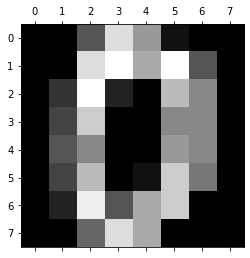

In [49]:
plt.gray()
plt.matshow(dataset.images[0])

In [50]:
pca = PCA(n_components=0.8)
X_reduced = pca.fit_transform(X)

In [51]:
pca.n_components_

13

In [52]:
X_reduced.shape

(1797, 13)

In [53]:
13.0 / 64

0.203125

$X_{recovered} = X_{d} W_d^T$

In [54]:
X_recovered = pca.inverse_transform(X_reduced)

In [55]:
X_recovered.shape

(1797, 64)

In [56]:
np.linalg.norm(X_recovered[0, :] - X[0, :])

11.519004991520534

<Figure size 432x288 with 0 Axes>

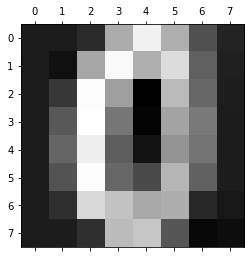

In [58]:
plt.gray()
plt.matshow(X_recovered[10, :].reshape((8,8)))

<Figure size 432x288 with 0 Axes>

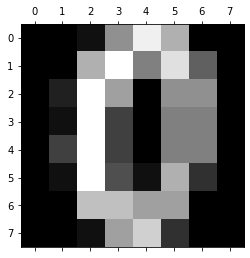

In [59]:
plt.gray()
plt.matshow(dataset.images[10])

In [60]:
pca = PCA(n_components=13, svd_solver='randomized') # full